In [2]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 7.5 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('housePrice/train.csv', index_col='Id')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 전처리

In [7]:
print(f'관측치 수 : {data.shape[0]} \n변수 수 : {data.shape[1]}')

관측치 수 : 1460 
변수 수 : 80


In [8]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
for categ in ['MSSubClass', 'OverallQual', 'OverallCond']:
    data[categ] = data[categ].astype(str)

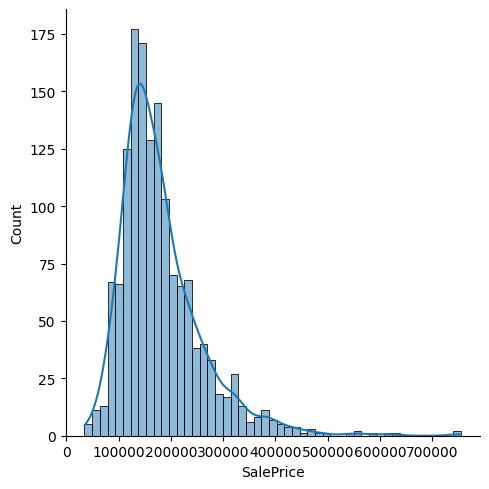

In [10]:
f = sns.displot(data['SalePrice'], kde=True)

In [11]:
X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

display(X.head(3))

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2021)

In [13]:
NaNinfo = X_train.isnull().sum()
NaNinfo = NaNinfo.sort_values(ascending = False)
NaNinfo = NaNinfo[NaNinfo > 0]
NaNinfo

PoolQC          1018
MiscFeature      984
Alley            957
Fence            823
MasVnrType       616
FireplaceQu      477
LotFrontage      190
GarageCond        54
GarageType        54
GarageYrBlt       54
GarageQual        54
GarageFinish      54
BsmtExposure      22
BsmtFinType2      21
BsmtFinType1      21
BsmtCond          21
BsmtQual          21
MasVnrArea         6
Electrical         1
dtype: int64

In [14]:
for col in NaNinfo.index:
    print(f'{col} : {data[col].unique().tolist()[:10]}')

PoolQC : [nan, 'Ex', 'Fa', 'Gd']
MiscFeature : [nan, 'Shed', 'Gar2', 'Othr', 'TenC']
Alley : [nan, 'Grvl', 'Pave']
Fence : [nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']
MasVnrType : ['BrkFace', nan, 'Stone', 'BrkCmn']
FireplaceQu : [nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po']
LotFrontage : [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0]
GarageCond : ['TA', 'Fa', nan, 'Gd', 'Po', 'Ex']
GarageType : ['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types']
GarageYrBlt : [2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993.0, 2004.0, 1973.0, 1931.0, 1939.0]
GarageQual : ['TA', 'Fa', 'Gd', nan, 'Ex', 'Po']
GarageFinish : ['RFn', 'Unf', 'Fin', nan]
BsmtExposure : ['No', 'Gd', 'Mn', 'Av', nan]
BsmtFinType2 : ['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ']
BsmtFinType1 : ['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ']
BsmtCond : ['TA', 'Gd', nan, 'Fa', 'Po']
BsmtQual : ['Gd', 'TA', 'Ex', nan, 'Fa']
MasVnrArea : [196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0, 306.0, 212.0, 180.0]
Electrical :

In [15]:
for feature in ['LotFrontage', 'LotArea', 'MasVnrArea',
               'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
               '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
               'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
               'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
               'ScreenPorch', 'PoolArea', 'MiscVal']:
    X_train[feature] = X_train[feature].fillna(X_train[feature].mean())
    X_test[feature] = X_test[feature].fillna(X_train[feature].mean())

In [16]:
for feature in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
               'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
               'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
               'Electrical', 'MSZoning', 'Functional', 'Utilities', 'KitchenQual', 'SaleType',
               'Exterior1st', 'Exterior2nd', 'MasVnrType']:
    X_train[feature] = X_train[feature].fillna('NaN')
    X_test[feature] = X_test[feature].fillna('NaN')

In [17]:
category = list(X_train.select_dtypes(include = [object]))
category[:10]

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood']

In [18]:
vec = DictVectorizer()
vec.fit(X_train[category].to_dict('records'))

scaler = StandardScaler()
scaler.fit(X_train.drop(category, axis = 1))

StandardScaler()

In [19]:
X_category = vec.transform(X_train[category].to_dict('records'))
X_train_category = pd.DataFrame(X_category.toarray(), columns = vec.feature_names_)
display(X_train_category.head())

X_train_without_category = X_train.drop(category, axis = 1)
X_scale = scaler.transform(X_train_without_category)
X_train_scale = pd.DataFrame(X_scale, columns = X_train_without_category.columns)
display(X_train_scale.head())

,Alley=Grvl,Alley=NaN,Alley=Pave,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,BldgType=Twnhs,BldgType=TwnhsE,BsmtCond=Fa,BsmtCond=Gd,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.001570,-0.053056,0.750385,0.445263,1.506176,0.598808,-0.298245,-0.293608,0.237928,0.096438,...,1.700600,1.625172,0.447993,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,2.067295,-1.332473
1,0.679972,0.066754,0.114431,-0.484927,-0.559450,0.194942,-0.298245,-0.898675,-0.799522,-0.908490,...,-0.191876,0.852289,2.416323,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,-1.585498,-1.332473
2,0.634030,-0.056239,1.118569,1.032751,0.476005,-0.923128,-0.298245,2.253678,1.126188,0.991132,...,1.414420,0.349915,-0.430185,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,0.240899,-1.332473
3,-0.055109,-0.045540,-0.320695,-1.121373,-0.559450,0.692335,-0.298245,-0.949482,-0.312930,-0.426535,...,-0.810393,0.396288,0.357147,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,-0.489660,-1.332473
4,1.185341,0.049070,-0.153339,1.081709,1.025429,-0.974142,-0.298245,0.364576,-0.806408,1.878136,...,0.408177,1.091883,-0.733005,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,-0.124381,1.662112


In [20]:
X_train_final = pd.concat([X_train_scale, X_train_category], axis = 1)
X_train_final.tail()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
1017,0.909685,0.007070,0.080960,0.592135,-0.55945,1.057939,0.767859,-0.388294,1.057331,0.980878,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1018,0.909685,0.300185,-0.521523,0.934836,-0.55945,-0.344962,2.905925,-0.743944,0.026766,1.655103,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1019,0.863743,0.081786,1.085098,0.934836,-0.55945,-0.974142,-0.298245,0.710988,-0.462121,-0.782874,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1020,0.000000,-0.284718,0.951213,0.739007,-0.55945,0.158807,-0.298245,-0.626164,-0.567703,-0.900800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1021,-0.468592,-0.297982,-0.688879,-1.659904,-0.55945,0.836876,-0.298245,-1.044168,-0.250959,-0.547024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [21]:
X_category = vec.transform(X_test[category].to_dict('records'))
X_test_category = pd.DataFrame(X_category.toarray(), columns = vec.feature_names_)
display(X_test_category.head())

X_test_without_category = X_test.drop(category, axis = 1)
X_scale = scaler.transform(X_test_without_category)
X_test_scale = pd.DataFrame(X_scale, columns = X_test_without_category.columns)
display(X_test_scale.head())

,Alley=Grvl,Alley=NaN,Alley=Pave,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,BldgType=Twnhs,BldgType=TwnhsE,BsmtCond=Fa,BsmtCond=Gd,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.157731,-0.221763,-1.927316,-1.708861,-0.559450,-0.542644,-0.298245,0.251415,-0.452940,-0.772620,...,-1.271972,-0.763037,-0.733005,1.249145,-0.115265,-0.272777,-0.06189,-0.084569,-0.124381,1.662112
1,-0.468592,0.007070,-2.395914,0.739007,-0.559450,-0.974142,-0.298245,-1.275109,-2.436032,-1.208431,...,-2.195131,0.937306,0.993069,3.152414,-0.115265,-0.272777,-0.06189,-0.084569,0.606178,0.164819
2,0.679972,-0.003717,0.683443,0.739007,1.220898,0.513784,-0.298245,0.995046,1.426865,2.470326,...,0.302014,-0.763037,-0.233352,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,-0.854940,-0.583827
3,0.000000,-0.481808,0.482615,0.053604,-0.559450,1.325766,-0.298245,-0.418316,0.898959,0.737337,...,-0.141102,-0.763037,0.478275,-0.353608,-0.115265,3.130109,-0.06189,-0.084569,2.067295,-1.332473
4,0.450259,-0.094614,0.181374,-0.387012,1.342405,0.484025,-0.298245,0.258343,0.662549,0.432269,...,0.712820,-0.763037,-0.490749,-0.353608,-0.115265,-0.272777,-0.06189,-0.084569,-0.854940,0.913466


In [22]:
X_test_final = pd.concat([X_test_scale, X_test_category], axis = 1)
X_test_final.tail()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
433,0.000000,-0.141035,0.683443,0.347348,0.338648,-0.974142,-0.298245,-0.388294,-1.554658,-0.905927,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
434,-2.260353,-0.816039,0.014017,-0.631799,-0.559450,-0.655301,2.513458,-1.275109,-0.990028,-1.372501,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
435,1.093455,-0.028121,1.252454,1.179623,-0.559450,-0.974142,-0.298245,1.556235,0.377938,0.155401,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
436,-1.754984,-0.549981,0.884270,0.641092,1.131088,0.866635,-0.298245,-0.494527,0.327443,0.099002,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
437,0.220546,0.245806,-2.630213,0.739007,-0.559450,-0.974142,-0.298245,1.581638,0.403186,0.911661,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [23]:
X_train, y_train = X_train_final.values, y_train.values
X_test, y_test = X_test_final.values, y_test.values

In [24]:
model_LR = LinearRegression(n_jobs = -1)
model_LR.fit(X_train, y_train)
display(pd.DataFrame(model_LR.coef_,
                    index = X_test_final.columns, columns = ['Linear regression 계수']))

,Linear regression 계수
LotFrontage,2.384770e+03
LotArea,6.785487e+03
YearBuilt,1.051538e+04
YearRemodAdd,2.135190e+03
MasVnrArea,3.449529e+03
...,...
SaleType=WD,-9.309178e+14
Street=Grvl,1.318573e+15
Street=Pave,1.318573e+15
Utilities=AllPub,-2.932344e+14


In [25]:
model_Lasso1 = Lasso(alpha = 0.0001, random_state = 1)
model_Lasso2 = Lasso(alpha = 100.0, random_state = 1)
model_Ridge1 = Ridge(alpha = 0.0001, random_state = 1)
model_Ridge2 = Ridge(alpha = 100.0, random_state = 1)

model_Lasso1.fit(X_train, y_train)
model_Lasso2.fit(X_train, y_train)
model_Ridge1.fit(X_train, y_train)
model_Ridge2.fit(X_train, y_train)

Ridge(alpha=100.0, random_state=1)

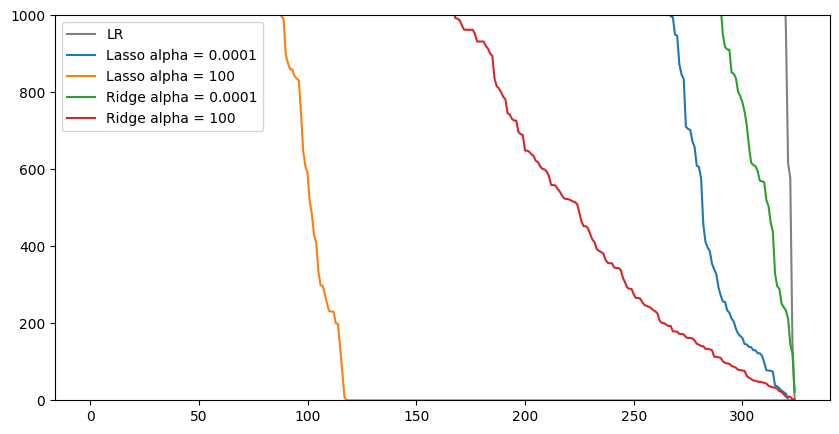

In [26]:
plt.figure(figsize = (10, 5))
plt.plot(sorted(np.abs(model_LR.coef_))[::-1], label = 'LR', c = 'gray')
plt.plot(sorted(np.abs(model_Lasso1.coef_))[::-1], label = 'Lasso alpha = 0.0001')
plt.plot(sorted(np.abs(model_Lasso2.coef_))[::-1], label = 'Lasso alpha = 100')
plt.plot(sorted(np.abs(model_Ridge1.coef_))[::-1], label = 'Ridge alpha = 0.0001')
plt.plot(sorted(np.abs(model_Ridge2.coef_))[::-1], label = 'Ridge alpha = 100')
plt.legend()
plt.ylim((-0.1, 1000))
plt.show()
